In [168]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# CL1

# IBP normal

In [169]:
with open('results/split_mnist_res5_split_normal_l1_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [170]:
with open('results/split_mnist_res5_split_normal.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [171]:
with open('results/split_mnist_res5_mh_beta_hack.pkl', 'rb') as input_file:
    d_beta = pickle.load(input_file)
d_beta.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [172]:
with open('results/split_mnist_res5_split_mnist_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [173]:
d['vcl_baselines'].keys()

dict_keys([5, 50])

In [174]:
d_bl100['vcl_baselines'].keys()

dict_keys([100])

In [175]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc_beta = d_beta['vcl_ibp']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_acc_beta = np.mean(ibp_acc_beta, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_acc_beta = np.nanmean(ibp_acc_beta, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

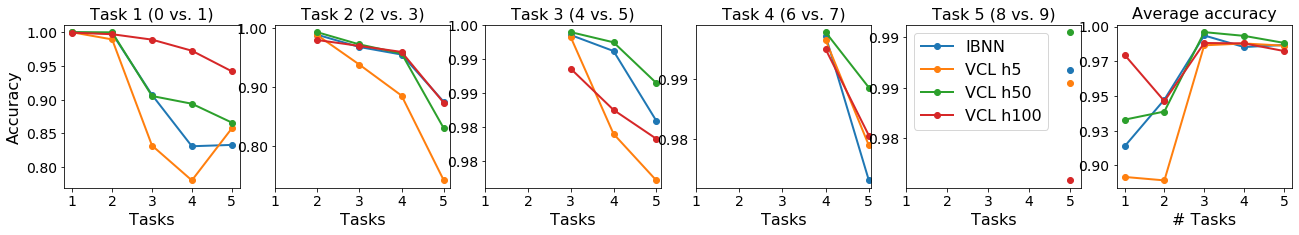

In [176]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_ibp_normal_mh_l1.pdf", bbox_inches='tight')
fig.show()

In [140]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP beta: {0} pm {1}".format(np.nanmean(ibp_acc_beta), np.nanmean(np.nanstd(ibp_acc_beta, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9529757520416159 pm 0.01958514019416123
Overall accuracies IBP beta: 0.884282915093735 pm 0.0175641350437863
Overall accuracies VCL h5: 0.9290287832382954 pm 0.043092013306687174
Overall accuracies VCL h50: 0.9587795277649633 pm 0.03920355019857497
Overall accuracies VCL h100: 0.9736987199767743 pm 0.009296121514490423


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [42]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

In [176]:
Z_ibp = d['Z']
len(Z_ibp)

5

In [177]:
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [178]:
len(_Z_ibp)

5

In [179]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2115, 100)

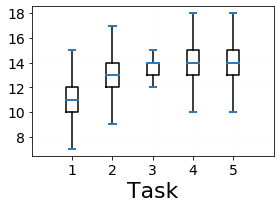

In [114]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_normal_ibp.pdf', bbox_inches='tight')
plt.show()

# CL2

In [177]:
with open('results/split_mnist_res5_split_normal_l1_sh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [178]:
with open('results/split_mnist_res5_sh_beta_hack.pkl', 'rb') as input_file:
    d_beta = pickle.load(input_file)
d_beta.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [179]:
with open('results/split_mnist_res5_split_mnist_normal_sh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [180]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc_beta = d_beta['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_acc_beta = np.mean(ibp_acc_beta, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_acc_beta = np.nanmean(ibp_acc_beta, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

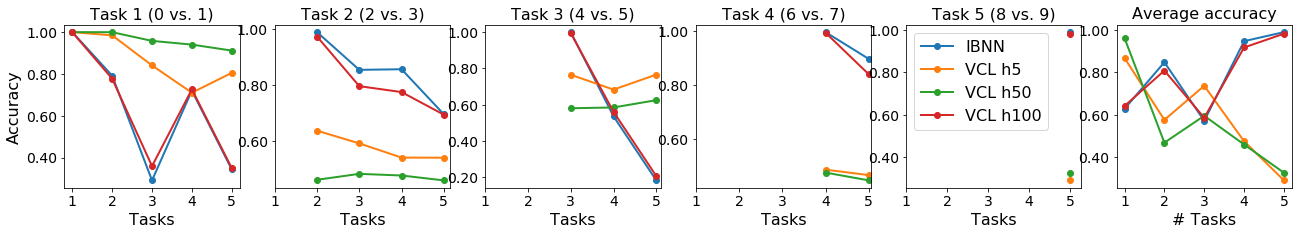

In [181]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_normal_ibp_sh_l1.pdf", bbox_inches='tight')
fig.show()

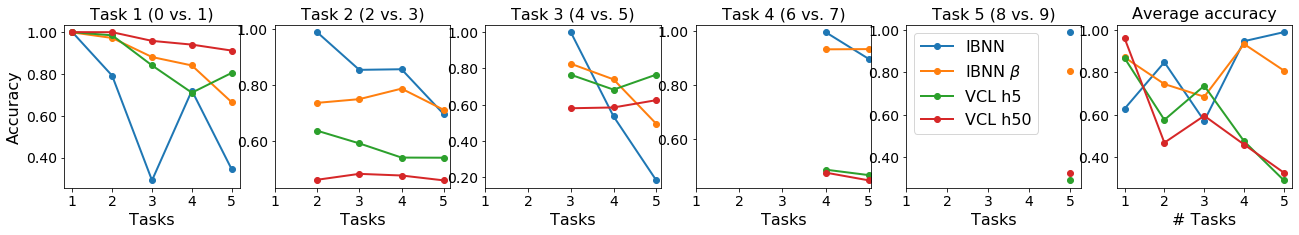

In [182]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc_beta[:, i]))+1, _ibp_acc_beta[:, i], label='IBNN $\\beta$', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_beta))+1, __ibp_acc_beta, label='IBNN $\\beta$', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_normal_ibp_sh_l1.pdf", bbox_inches='tight')
fig.show()

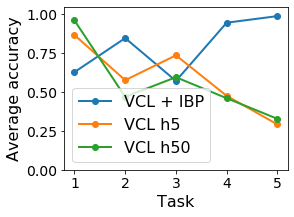

In [100]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='VCL + IBP', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax.set_xticks(range(1, len(__ibp_acc)+1))
ax.set_ylabel('Average accuracy', fontsize=legend_size)
ax.set_xlabel('Task', fontsize=legend_size)
ax.set_ylim(0.0, 1.05)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.legend(fontsize=legend_size, loc= 'lower left')
plt.savefig("plots/av_acc_ibp_split_mnist_sh.pdf", bbox_inches='tight')
fig.show()

In [18]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP beta: {0} pm {1}".format(np.nanmean(ibp_acc_beta), np.nanmean(np.nanstd(ibp_acc_beta, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.742464732180369 pm 0.018700345287763227
Overall accuracies IBP beta: 0.8046312686033499 pm 0.019993860782016083
Overall accuracies VCL h5: 0.6735217702519717 pm 0.060195173454257275
Overall accuracies VCL h50: 0.6483588843402159 pm 0.05572092010573503
Overall accuracies VCL h100: 0.734787720880672 pm 0.012830108844782775


In [60]:
Z_ibp = d['Z']
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2115, 100)

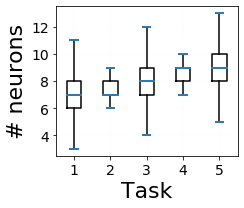

In [104]:
fig_size=(3.5,3)
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.8)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.8)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.ylabel('# neurons', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_normal_ibp_sh.pdf', bbox_inches='tight')
plt.show()

# IBP random

In [183]:
with open('results/split_mnist_res5_random_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [184]:
with open('results/split_mnist_res5_ibp_rs_split_random_noise_rs_l1_mh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [185]:
with open('results/split_mnist_res5_split_mnist_random_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [186]:
d_rs['opt_params']

{'learning_rate': 0.0008335670858067363,
 'alpha0': 41.35960872383244,
 'lambda_1': 0.8727902595597832,
 'lambda_2': 0.884473036312595,
 'prior_var': 0.2004417949743666,
 'alpha': 11.589043508692054,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 128.0,
 'beta0': 1.0}

In [187]:
ibp_acc_rs = d_rs['vcl_ibp']
print("Overall accuracies IBP RS: {0} pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))

Overall accuracies IBP RS: 0.9166935581763584 pm 0.018938228680493146


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [188]:
with open('results/split_mnist_res5_split_random.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [189]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

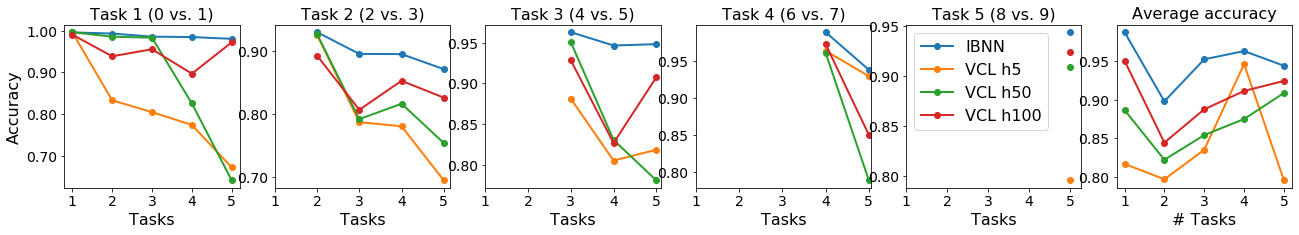

In [190]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_ibp_random_mh_l1.pdf", bbox_inches='tight')
fig.show()

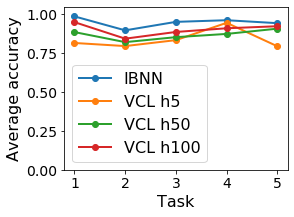

In [191]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax.set_xticks(range(1, len(__ibp_acc)+1))
ax.set_ylabel('Average accuracy', fontsize=legend_size)
ax.set_xlabel('Task', fontsize=legend_size)
ax.set_ylim(0.0, 1.05)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.legend(fontsize=legend_size, loc= 'lower left')
plt.savefig("plots/av_acc_ibp_split_mnist_mh.pdf", bbox_inches='tight')
fig.show()

In [35]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9505302564897856 pm 0.010747197352811237
Overall accuracies VCL h5: 0.8307996569750435 pm 0.07423431095048376
Overall accuracies VCL h50: 0.8627729046356846 pm 0.05088350271217945
Overall accuracies VCL h100: 0.9026689988871416 pm 0.03195987639252343


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [201]:
Z_ibp = d['Z']
len(Z_ibp)

5

In [202]:
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [203]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

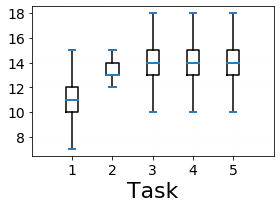

In [204]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.8)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.8)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_random_ibp_mh.pdf', bbox_inches='tight')
plt.show()

# CL2

In [233]:
with open('results/split_mnist_res5_random_sh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [234]:
with open('results/split_mnist_res5_ibp_rs_split_random_random_l1_rs_sh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [235]:
with open('results/split_mnist_res5_split_mnist_random_sh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [236]:
d_rs['opt_params']

{'learning_rate': 2.847329307494952e-05,
 'alpha0': 6.024484319417751,
 'lambda_1': 0.8988395743016853,
 'lambda_2': 0.8751149354124022,
 'prior_var': 0.6217498065348745,
 'alpha': 3.832010597445093,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 128.0,
 'beta0': 1.0}

In [237]:
ibp_acc_rs = d_rs['vcl_ibp']
print("Overall accuracies IBP RS: {0} pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))

Overall accuracies IBP RS: 0.7905430393519776 pm 0.025382132982043858


In [238]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_acc_rs = np.mean(ibp_acc_rs, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_acc_rs = np.nanmean(ibp_acc_rs, (0, 1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

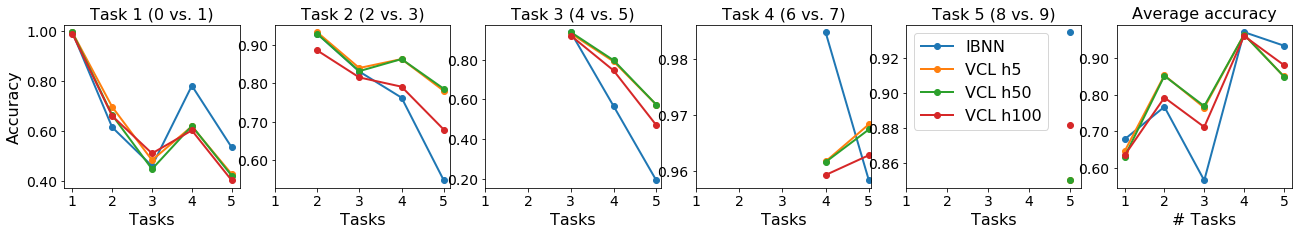

In [239]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

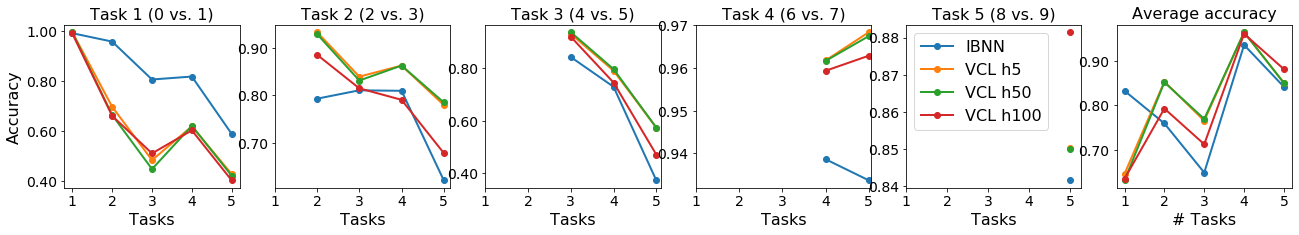

In [240]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc_rs[:, i]))+1, _ibp_acc_rs[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size, loc='upper left')
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __ibp_acc_rs, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_ibp_random_l1_sh_rs.pdf", bbox_inches='tight')
fig.show()

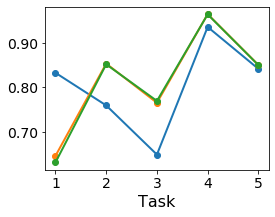

In [200]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(__ibp_acc_rs))+1, __ibp_acc_rs, label='IBNN', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax.set_xticks(range(1, len(__ibp_acc)+1))
#ax.set_ylabel('Average accuracy', fontsize=legend_size)
ax.set_xlabel('Task', fontsize=legend_size)
#ax.set_ylim(0.0, 1.05)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.legend(fontsize=legend_size, loc= 'lower left')
plt.savefig("plots/av_acc_ibp_split_mnist_random_sh.pdf", bbox_inches='tight')
fig.show()

In [201]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP RS: {0} pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.7357322627533154 pm 0.02146758794742769
Overall accuracies IBP RS: 0.7905430393519776 pm 0.025382132982043858
Overall accuracies VCL h5: 0.7810616245653081 pm 0.049696437801360134
Overall accuracies VCL h50: 0.7764717665224307 pm 0.06093486572670085
Overall accuracies VCL h100: 0.7520834506057479 pm 0.046877514777816556


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [77]:
Z_ibp = d['Z']
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

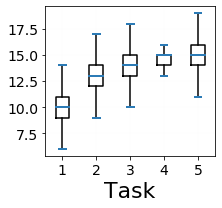

In [78]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_bp_random_ibp_sh.pdf', bbox_inches='tight')
plt.show()

In [79]:
Z_ibp = d_rs['Z']
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

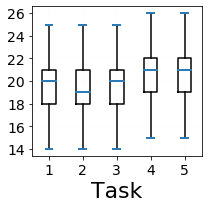

In [80]:
fig_size=(3, 3)
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.8)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.8)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2 -1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_random_ibp_sh.pdf', bbox_inches='tight')
plt.show()

# background MNIST

# CL1

In [246]:
with open('results/split_mnist_res5_background_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [247]:
#split_mnist_res5_split_background.pkl
with open('results/split_mnist_res5_split_background.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [248]:
#split_mnist_res5_split_background.pkl
with open('results/split_mnist_res5_split_mnist_bck_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [249]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

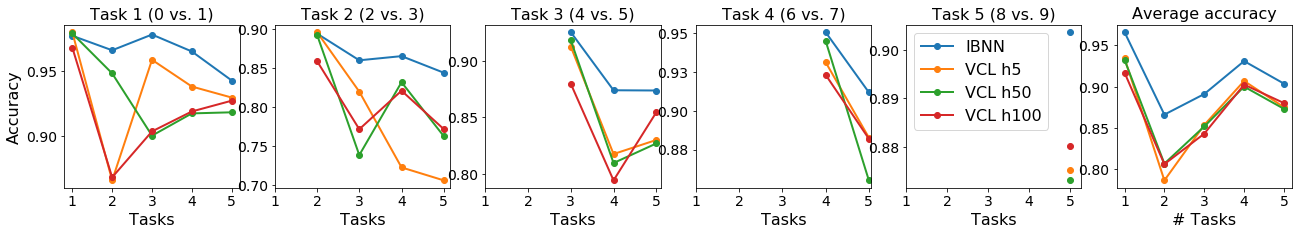

In [250]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size, loc='upper left')
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_ibp_background_l1_mh.pdf", bbox_inches='tight')
fig.show()

In [251]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9156278702278187, pm 0.012168977335323591
Overall accuracies VCL h5: 0.8711126943116426 pm 0.04459472381145026
Overall accuracies VCL h50: 0.8745120741837208 pm 0.03588567768291211
Overall accuracies VCL h50: 0.8681924813288489 pm 0.03162752898764158


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [192]:
Z_ibp = d['Z']
len(Z_ibp[0])

5

In [193]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2126, 100)

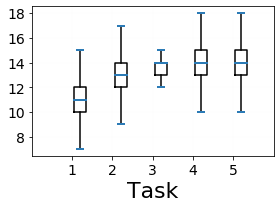

In [195]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_background_ibp_mh.pdf', bbox_inches='tight')
plt.show()

# CL2

In [208]:
with open('results/split_mnist_res5_background_sh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [209]:
with open('results/split_mnist_res5_ibp_rs_split_background_l1_sh_rs_background.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [210]:
with open('results/split_mnist_res5_split_mnist_background_sh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [211]:
d_rs['opt_params']

{'learning_rate': 3.877000928603503e-05,
 'alpha0': 1.911108142223354,
 'lambda_1': 0.8632406677666007,
 'lambda_2': 0.579019049948059,
 'prior_var': 0.6939797581510593,
 'alpha': 1.4861135449262135,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 128.0,
 'beta0': 1.0}

In [212]:
ibp_acc = d['vcl_ibp']
ibp_acc_rs = d_rs['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_acc_rs = np.mean(ibp_acc_rs, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_acc_rs = np.nanmean(ibp_acc_rs, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

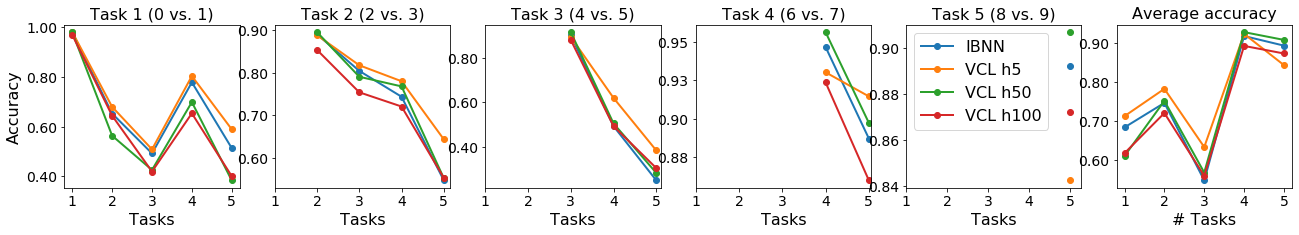

In [213]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_ibp_background_l1_sh.pdf", bbox_inches='tight')
fig.show()

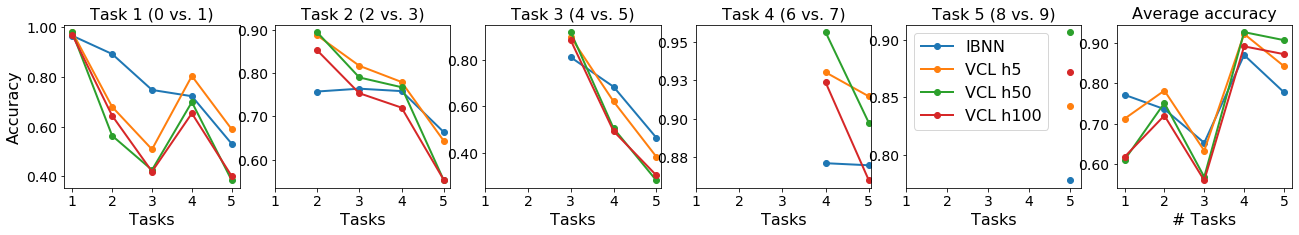

In [215]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc_rs[:, i]))+1, _ibp_acc_rs[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __ibp_acc_rs, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_ibp_background_l1_sh_rs.pdf", bbox_inches='tight')
fig.show()

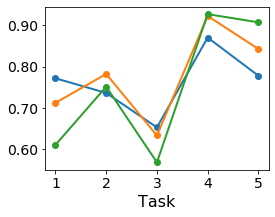

In [217]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(__ibp_acc_rs))+1, __ibp_acc_rs, label='IBNN', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc_rs))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax.set_xticks(range(1, len(__ibp_acc_rs)+1))
#ax.set_ylabel('Average accuracy', fontsize=legend_size)
ax.set_xlabel('Task', fontsize=legend_size)
#ax.set_ylim(0.0, 1.05)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.legend(fontsize=legend_size, loc= 'lower left')
plt.savefig("plots/av_acc_ibp_split_mnist_background_sh.pdf", bbox_inches='tight')
fig.show()

In [218]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP RS: {0}, pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.7179819341334993, pm 0.02017287108170339
Overall accuracies IBP RS: 0.7517403101880664, pm 0.03245343418493633
Overall accuracies VCL h5: 0.7515941697944177 pm 0.057630040415689955
Overall accuracies VCL h50: 0.7012596908218263 pm 0.026019215729213615
Overall accuracies VCL h100: 0.6866494638961711 pm 0.016326226727477487


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [87]:
Z_ibp = d['Z']
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2126, 100)

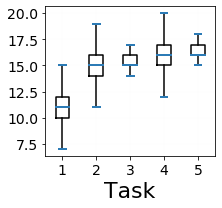

In [89]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_ibp_background_sh.pdf', bbox_inches='tight')
plt.show()

In [90]:
Z_ibp = d_rs['Z']
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2126, 100)

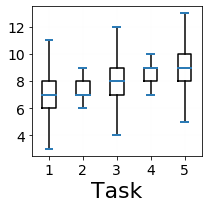

In [91]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_ibp_background_sh.pdf', bbox_inches='tight')
plt.show()

## Permuted MNIST

In [219]:
with open('results/permuted_mnist_res5_perm_l1_mh_new.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [220]:
with open('results/permuted_mnist_res5_perm_l1_mh.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [221]:
with open('results/permuted_mnist_res5_perm_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [222]:
Z_ibp = d['Z']
[item.shape for item in Z_ibp[4]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [223]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h5 = d_baselines['vcl_baselines'][5]
vcl_result_h50 = d_baselines['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

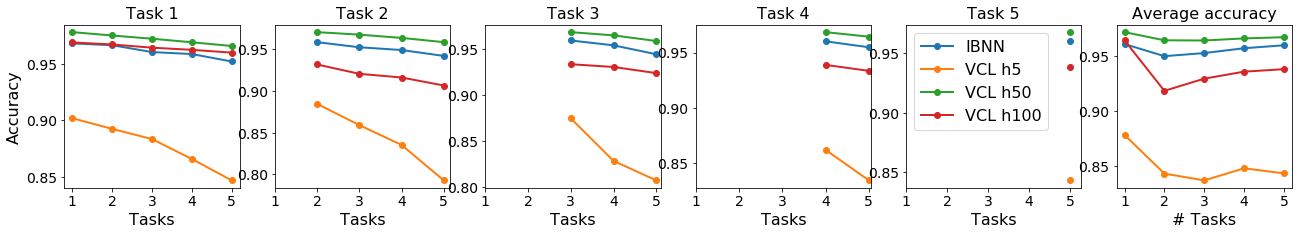

In [224]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_ibp_perm_mh_all.pdf", bbox_inches='tight')
fig.show()

In [225]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9560959999999998, pm 0.002011861533081928
Overall accuracies VCL h5: 0.8540106666666666 pm 0.009992434791613429
Overall accuracies VCL h50: 0.967593333333333 pm 0.0013626490255064343
Overall accuracies VCL h100: 0.9397761208598625 pm 0.0017017417870295428


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [110]:
Z_ibp = d['Z']
[item.shape for item in Z_ibp[1]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [91]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [92]:
__Z_ibp[0].shape

(50000, 100)

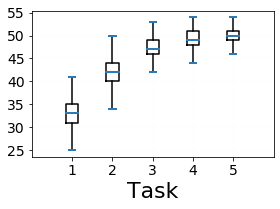

In [89]:
plt.figure(figsize=fig_size)
grid_color = '0.1'
grid_lw = 0.2

if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_perm_mh_ibp.pdf', bbox_inches='tight')
plt.show()

/nfs/home/samuelk/IBP_BNN/ddm/visualise.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


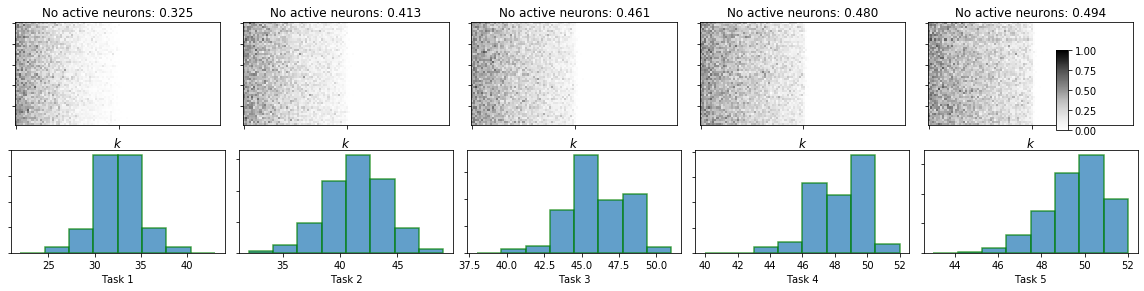

In [68]:
from visualise import plot_Zs
num_layers=1
Zs=Z_ibp[1]
dataset='perm'
tag='cl1'
plot_Zs(num_tasks, num_layers, Zs, dataset, tag)

## Variation with h

In [111]:
# permuted_mnist_res5_l1_mh_new.pkl
with open('results/permuted_mnist_res5_l1_mh_new.pkl', 'rb') as input_file:
    d_vcl = pickle.load(input_file)
d_vcl['vcl_baselines'].keys()

dict_keys([10, 20, 100, 200, 400, 800])

In [112]:
vcl_result_h10 = d_vcl['vcl_baselines'][10]
vcl_result_h20 = d_vcl['vcl_baselines'][20]
vcl_result_h100 = d_vcl['vcl_baselines'][100]
vcl_result_h200 = d_vcl['vcl_baselines'][200]
vcl_result_h400 = d_vcl['vcl_baselines'][400]
vcl_result_h800 = d_vcl['vcl_baselines'][800]

# _ibp_acc = np.mean(ibp_acc, 0)
# _vcl_result_h5 = np.mean(vcl_result_h5, 0)
# _vcl_result_h50 = np.mean(vcl_result_h50, 0)
# _vcl_result_h100 = np.mean(vcl_result_h100, 0)
# __ibp_acc = np.nanmean(ibp_acc, (0,1))
# __vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
# __vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
# __vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

In [113]:
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h20: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h200: {0} pm {1}".format(np.nanmean(vcl_result_h200), np.nanmean(np.nanstd(vcl_result_h200, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))
print("Overall accuracies VCL h800: {0} pm {1}".format(np.nanmean(vcl_result_h800), np.nanmean(np.nanstd(vcl_result_h800, 0))))

Overall accuracies VCL h5: 0.8540106666666666 pm 0.009992434791613429
Overall accuracies VCL h10: 0.8637095068376275 pm 0.01616462927127806
Overall accuracies VCL h20: 0.9088298390183267 pm 0.006695536378857124
Overall accuracies VCL h50: 0.967593333333333 pm 0.0013626490255064343
Overall accuracies VCL h100: 0.9407231407326488 pm 0.002852814025231545
Overall accuracies VCL h200: 0.9418002634712414 pm 0.0037809465799702015
Overall accuracies VCL h400: 0.9384276767420867 pm 0.001934636880943343
Overall accuracies VCL h800: 0.9362017274305285 pm 0.0018195453112221408


In [119]:
xs = [5, 10, 20, 50, 100, 200, 400, 800]
res = [vcl_result_h5, vcl_result_h10, vcl_result_h20, vcl_result_h50, vcl_result_h100, vcl_result_h200,
      vcl_result_h400, vcl_result_h800]
accs = [np.nanmean(i) for i in res]
stds = [np.nanmean(np.nanstd(i, 0)) for i in res]
acc_ibp = np.nanmean(ibp_acc)
acc_std_ibp = np.nanmean(np.nanstd(ibp_acc, 0))

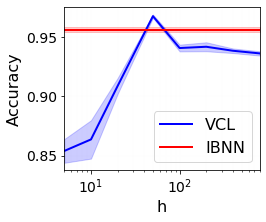

In [130]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))
ax.plot(xs, accs, linewidth=lw, color='b')
ax.fill_between(xs,
               [x - y for x, y in zip(accs, stds)],
               [x + y for x, y in zip(accs, stds)],
               alpha=0.2, color='b')
ax.plot(xs, [acc_ibp]*len(accs), linewidth=lw, color='r')
ax.fill_between(xs,
               [x - y for x, y in zip([acc_ibp]*len(accs), [acc_std_ibp]*len(accs))],
               [x + y for x, y in zip([acc_ibp]*len(accs), [acc_std_ibp]*len(accs))],
               alpha=0.2, color='r')
#ax.axvline(50, c='c')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.legend(['VCL', 'IBNN'], fontsize=legend_size, loc='lower right')
plt.xscale('log')
#ax.set_title('', fontsize=legend_size)
#ax.set_xticks(range(1, len(_ibp_acc[:,i])+1))
ax.set_xlim(5, 800)
ax.set_xlabel('h', fontsize=legend_size)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.tick_params(labelsize=tick_size)
ax.set_ylabel('Accuracy', fontsize=legend_size)
#ax[5].legend()
plt.savefig("plots/accs_perm_h_study.pdf", bbox_inches='tight')
fig.show()

# CL2

In [226]:
with open('results/permuted_mnist_res5_perm_l1_sh_new.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [227]:
with open('results/permuted_mnist_res5_perm_l1_sh.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [228]:
with open('results/permuted_mnist_res5_perm_sh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [229]:
Zs_ibp = d['Z']
[item.shape for item in Zs_ibp[4]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [230]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h5 = d_baselines['vcl_baselines'][5]
vcl_result_h50 = d_baselines['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

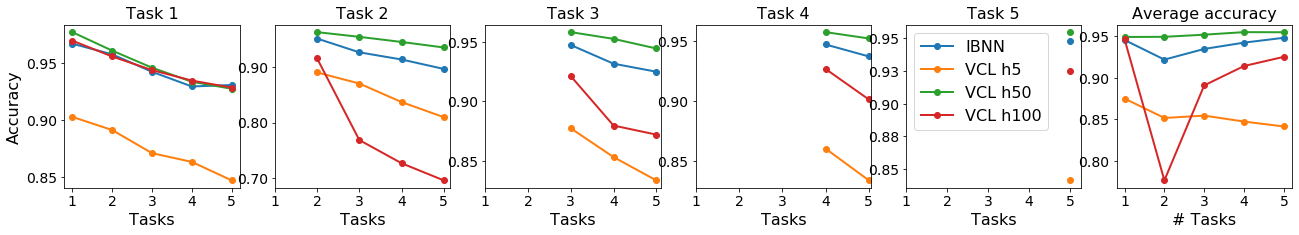

In [231]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_ibp_perm_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [232]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9365973333333333, pm 0.00613091630882523
Overall accuracies VCL h5: 0.8587306666666666 pm 0.003763207937658027
Overall accuracies VCL h50: 0.9506226666666665 pm 0.003899653522012814
Overall accuracies VCL h100: 0.8842732859764421 pm 0.01870146503533352


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [172]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

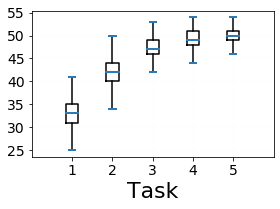

In [173]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_ibp_perm_sh.pdf', bbox_inches='tight')
plt.show()